In [3]:
import pandas as pd
import numpy as np
import re
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [4]:
import warnings 
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv("all_upwork_jobs_2024-02-07-2024-03-24.csv") 

In [6]:
df

,title,link,published_date,is_hourly,hourly_low,hourly_high,budget,country
0,Experienced Media Buyer For Solar Pannel and R...,https://www.upwork.com/jobs/Experienced-Media-...,2024-02-17 09:09:54+00:00,False,NaN,NaN,500.0,NaN
1,Full Stack Developer,https://www.upwork.com/jobs/Full-Stack-Develop...,2024-02-17 09:09:17+00:00,False,NaN,NaN,1100.0,United States
2,SMMA Bubble App,https://www.upwork.com/jobs/SMMA-Bubble-App_%7...,2024-02-17 09:08:46+00:00,True,10.0,30.0,NaN,United States
3,Talent Hunter Specialized in Marketing,https://www.upwork.com/jobs/Talent-Hunter-Spec...,2024-02-17 09:08:08+00:00,True,NaN,NaN,NaN,United States
4,Data Engineer,https://www.upwork.com/jobs/Data-Engineer_%7E0...,2024-02-17 09:07:42+00:00,False,NaN,NaN,650.0,India
...,...,...,...,...,...,...,...,...
244823,Need Facebook advertising experts to launch pr...,https://www.upwork.com/jobs/Need-Facebook-adve...,2024-03-24 13:28:38+00:00,True,20.0,100.0,NaN,Zambia
244824,Digital/Telemarketing/Sales/OutSide Sales,https://www.upwork.com/jobs/Digital-Telemarket...,2024-03-24 13:40:52+00:00,False,NaN,NaN,100.0,Sri Lanka
244825,WordPress Template Edits,https://www.upwork.com/jobs/WordPress-Template...,2024-03-24 13:37:50+00:00,True,5.0,30.0,NaN,United States
244826,ELEMENTOR PRO For quick fix (Wordpress),https://www.upwork.com/jobs/ELEMENTOR-PRO-For-...,2024-03-24 13:52:15+00:00,False,NaN,NaN,15.0,France


# Data Cleaning

In [8]:
df.head()

,title,link,published_date,is_hourly,hourly_low,hourly_high,budget,country
0,Experienced Media Buyer For Solar Pannel and R...,https://www.upwork.com/jobs/Experienced-Media-...,2024-02-17 09:09:54+00:00,False,NaN,NaN,500.0,NaN
1,Full Stack Developer,https://www.upwork.com/jobs/Full-Stack-Develop...,2024-02-17 09:09:17+00:00,False,NaN,NaN,1100.0,United States
2,SMMA Bubble App,https://www.upwork.com/jobs/SMMA-Bubble-App_%7...,2024-02-17 09:08:46+00:00,True,10.0,30.0,NaN,United States
3,Talent Hunter Specialized in Marketing,https://www.upwork.com/jobs/Talent-Hunter-Spec...,2024-02-17 09:08:08+00:00,True,NaN,NaN,NaN,United States
4,Data Engineer,https://www.upwork.com/jobs/Data-Engineer_%7E0...,2024-02-17 09:07:42+00:00,False,NaN,NaN,650.0,India


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244828 entries, 0 to 244827
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   title           244827 non-null  object 
 1   link            244827 non-null  object 
 2   published_date  244828 non-null  object 
 3   is_hourly       244828 non-null  bool   
 4   hourly_low      102422 non-null  float64
 5   hourly_high     98775 non-null   float64
 6   budget          103891 non-null  float64
 7   country         239751 non-null  object 
dtypes: bool(1), float64(3), object(4)
memory usage: 13.3+ MB


Here i check for info and i got some null values and some wrong dtypes.

In [480]:
import pandas as pd

# Convert text columns to 'string' dtype
df['title'] = df['title'].astype('string')
df['link'] = df['link'].astype('string')
df['country'] = df['country'].astype('string')

# Convert published_date to datetime, handling errors gracefully
df['published_date'] = pd.to_datetime(df['published_date'], errors='coerce', utc=True)
df['date'] = df['published_date'].dt.date

print("Number of bad dates:", df['published_date'].isna().sum())

# Fill missing numerical values with the median
median_hourly_low = df['hourly_low'].median()
df['hourly_low'].fillna(median_hourly_low, inplace=True)

median_hourly_high = df['hourly_high'].median()
df['hourly_high'].fillna(median_hourly_high, inplace=True)

# For categorical data, 'Unknown' is a correct and safe placeholder
df['country'].fillna('Unknown', inplace=True)

Number of bad dates: 0


The dataset’s published_date column has a few missing or invalid dates (NaT), which need handling before analysis.

Hourly rates (hourly_low, hourly_high) generally look reasonable, but a small number of negative values exist, which should be cleaned or removed.

Overall, the data is mostly clean, but minor preprocessing is required for dates and rates before modeling.

In [205]:
df.isnull().sum()

title             0
link              0
published_date    0
is_hourly         0
hourly_low        0
hourly_high       0
budget            0
country           0
job_type          0
hourly_avg        0
year              0
month             0
day               0
salary            0
clean_title       0
dtype: int64

In [13]:
df.describe()

,hourly_low,hourly_high,budget,hourly_avg,year,month,day
count,244827.000000,244827.000000,244827.000000,244827.000000,244827.000000,244827.000000,244827.000000
mean,7.253943,16.932965,386.778827,12.093454,2023.999955,2.583461,16.082209
std,14.519705,36.711526,10256.494177,24.254869,0.006703,0.497785,7.544227
min,0.000000,0.000000,0.000000,0.000000,2023.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,2024.000000,2.000000,11.000000
50%,0.000000,0.000000,0.000000,0.000000,2024.000000,3.000000,17.000000
75%,10.000000,25.000000,50.000000,19.500000,2024.000000,3.000000,22.000000
max,998.000000,999.000000,1000000.000000,998.500000,2024.000000,12.000000,31.000000


# Define a single salary column

In [431]:
df['salary'] = df['hourly_avg']
df.loc[df['job_type'] == "Fixed", 'salary'] = df['budget']


This code is creating a unified salary column for all jobs:

For hourly-based jobs, it assigns salary = hourly_avg.

For fixed-price jobs (job_type == "Fixed"), it overwrites salary with the budget value.

✅ This ensures a single numeric column salary that can be used for analysis or modeling.

# EDA

# Outliers detection and handling

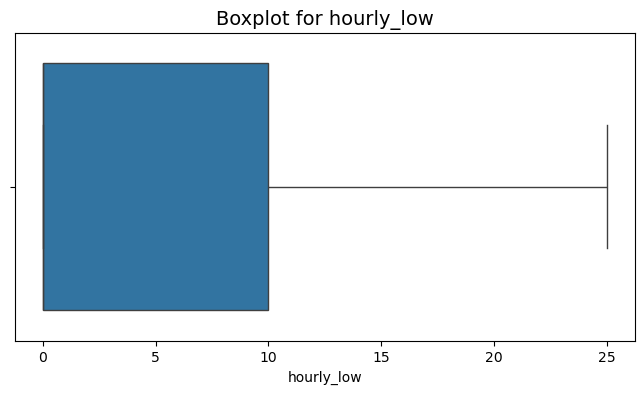

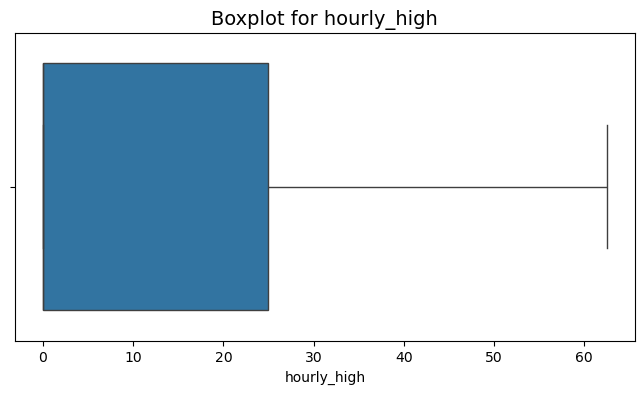

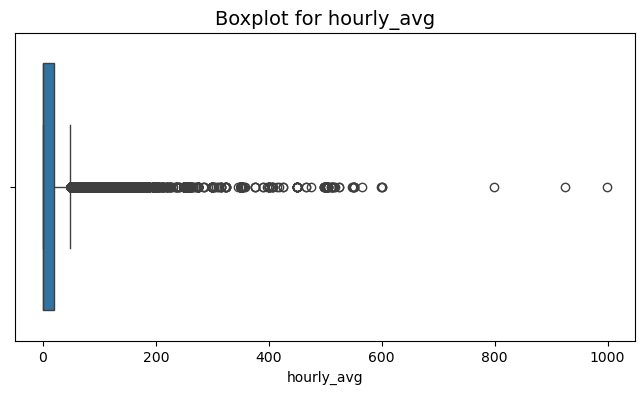

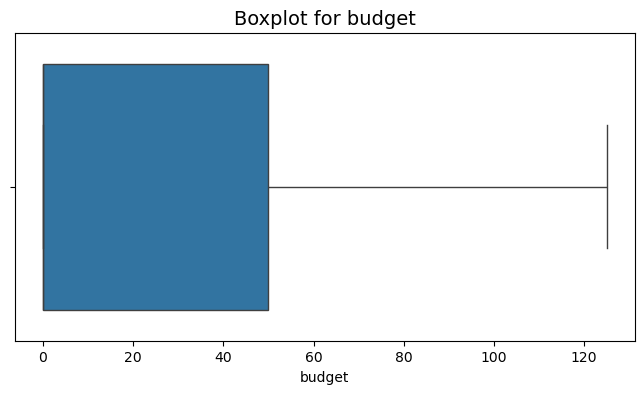

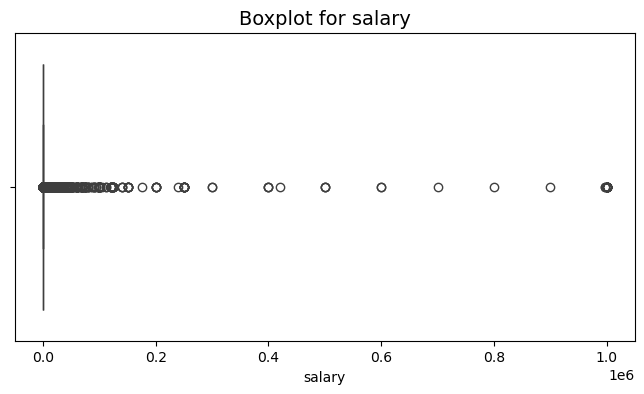

In [242]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select numeric columns
numeric_cols = ['hourly_low', 'hourly_high', 'hourly_avg', 'budget', 'salary']

# Plot boxplots
for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot for {col}', fontsize=14)
    plt.xlabel(col)
    plt.show()


These boxplots will help you visually inspect the distribution and outliers in your numeric columns:

hourly_low / hourly_high / hourly_avg – Check consistency and spot unusually low or high hourly rates.

budget – Useful to detect extremely high or low fixed-price jobs.

salary – The combined column you created; boxplot shows the overall spread and outliers.

💡 Insights we get:

Outliers may distort your model, so consider filtering or capping extreme values.

If distributions are heavily skewed, you might apply transformations (e.g., log) for better modeling.

In [244]:
import numpy as np

def handle_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = np.where(df[column] < lower_bound, lower_bound,
                          np.where(df[column] > upper_bound, upper_bound, df[column]))
    return df

# Apply to numeric columns
for col in numeric_cols:
    df = handle_outliers_iqr(df, col)


Extreme values in hourly_low, hourly_high, hourly_avg, budget, and salary are capped to reduce their impact.

The data is now less skewed, making it more robust for modeling and reducing the influence of outliers on predictions.

This ensures your regression or clustering models will perform more reliably without being distorted by extreme salaries.

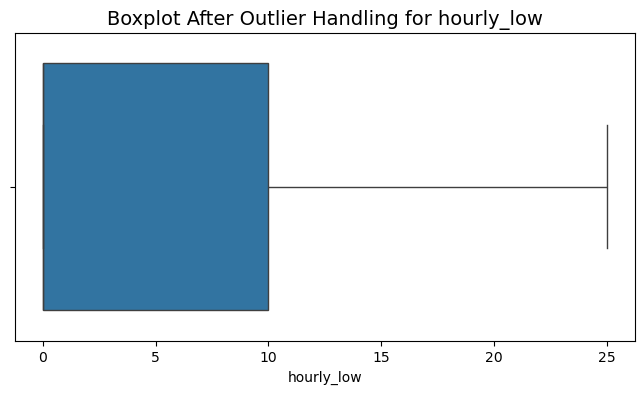

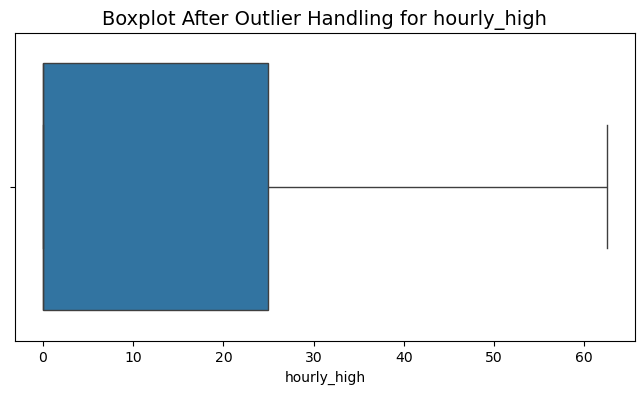

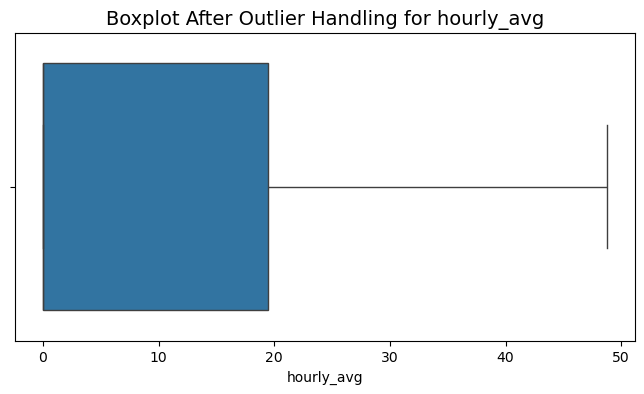

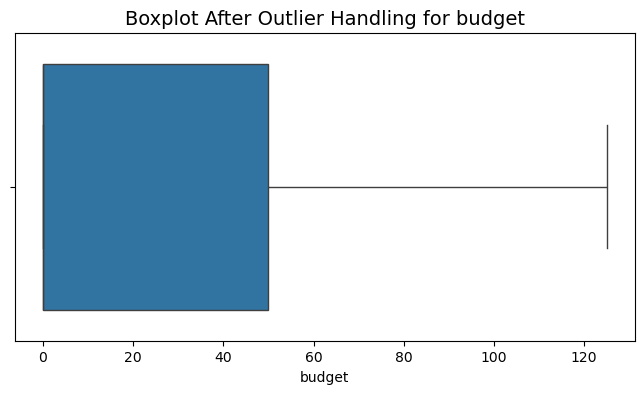

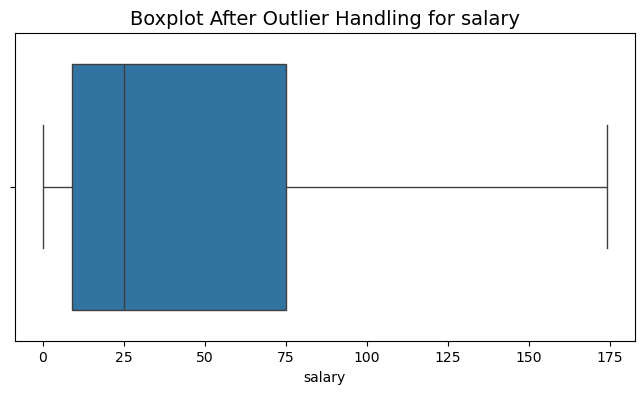

In [246]:
for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot After Outlier Handling for {col}', fontsize=14)
    plt.xlabel(col)
    plt.show()


These boxplots will now show the numeric columns after outlier capping:

Most extreme points are removed or capped, so the whiskers are shorter.

The data distribution appears more compact and consistent.

This confirms that outliers have been effectively controlled, making the dataset cleaner for modeling.

# Univariate Analysis

# Univariate Analysis for Numeric Columns

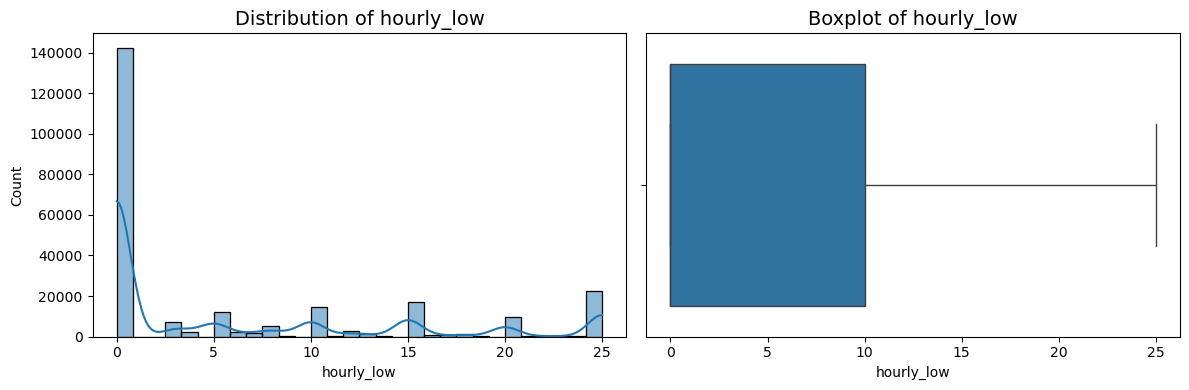

📊 Summary of hourly_low
count    244827.000000
mean          5.872040
std           8.485341
min           0.000000
25%           0.000000
50%           0.000000
75%          10.000000
max          25.000000
Name: hourly_low, dtype: float64
--------------------------------------------------


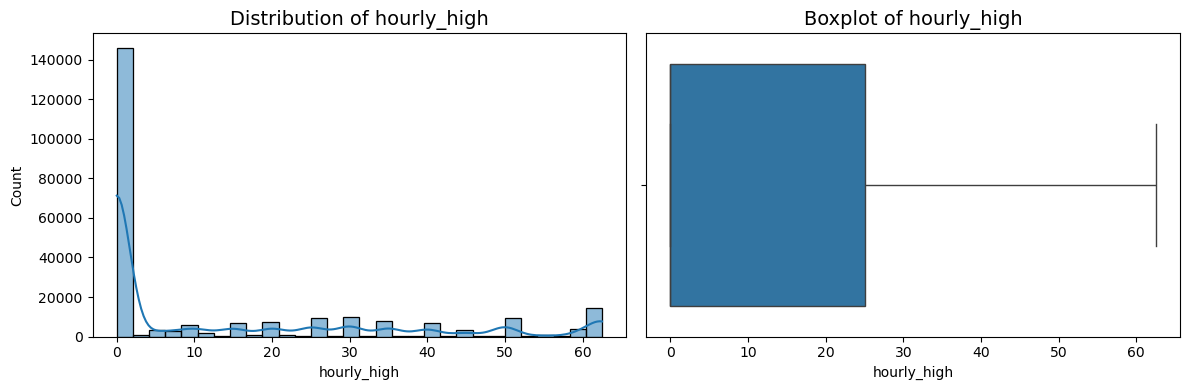

📊 Summary of hourly_high
count    244827.000000
mean         13.781429
std          20.386070
min           0.000000
25%           0.000000
50%           0.000000
75%          25.000000
max          62.500000
Name: hourly_high, dtype: float64
--------------------------------------------------


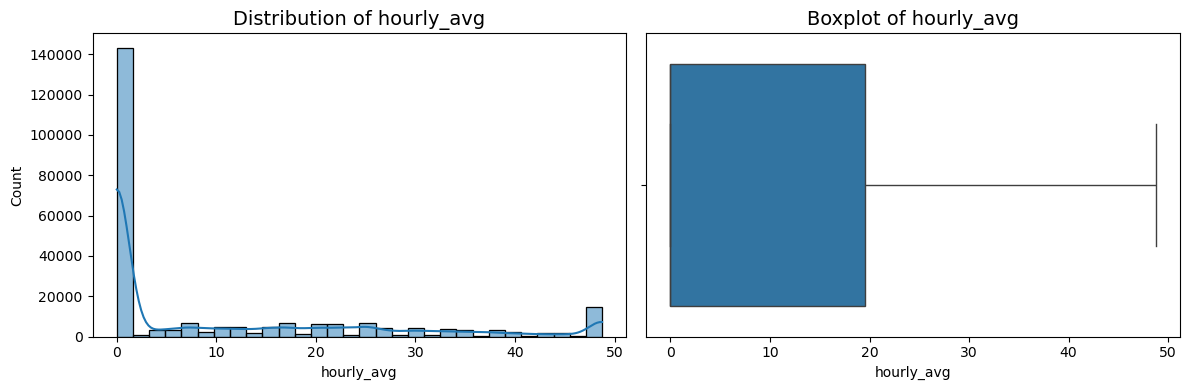

📊 Summary of hourly_avg
count    244827.000000
mean         10.272305
std          15.200585
min           0.000000
25%           0.000000
50%           0.000000
75%          19.500000
max          48.750000
Name: hourly_avg, dtype: float64
--------------------------------------------------


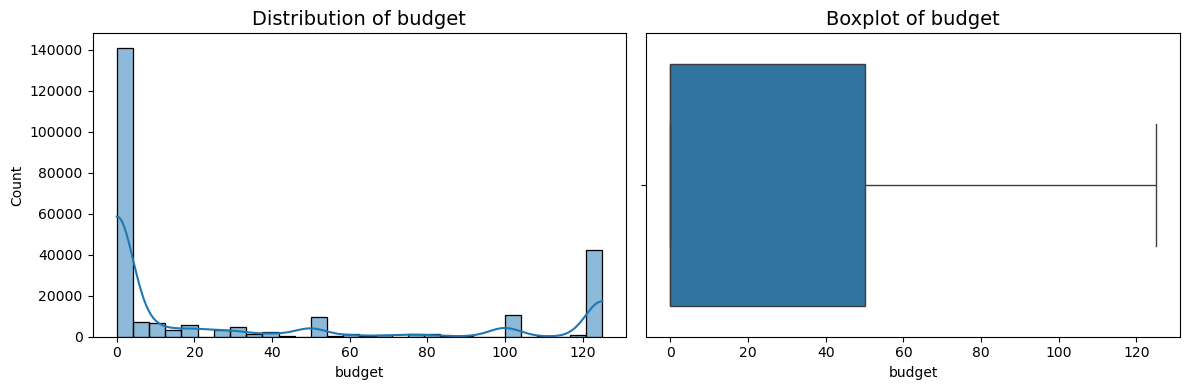

📊 Summary of budget
count    244827.000000
mean         32.591230
std          48.996939
min           0.000000
25%           0.000000
50%           0.000000
75%          50.000000
max         125.000000
Name: budget, dtype: float64
--------------------------------------------------


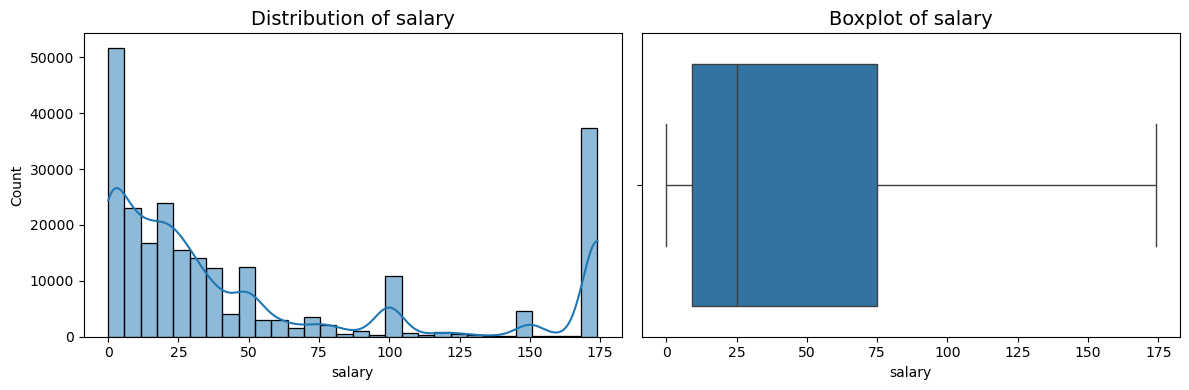

📊 Summary of salary
count    244827.000000
mean         52.287021
std          60.447570
min           0.000000
25%           9.000000
50%          25.000000
75%          75.000000
max         174.000000
Name: salary, dtype: float64
--------------------------------------------------


In [249]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_cols = ['hourly_low', 'hourly_high', 'hourly_avg', 'budget', 'salary']

for col in numeric_cols:
    plt.figure(figsize=(12,4))
    
    # Histogram + KDE
    plt.subplot(1,2,1)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}", fontsize=14)
    
    # Boxplot
    plt.subplot(1,2,2)
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}", fontsize=14)
    
    plt.tight_layout()
    plt.show()

    # Summary Statistics
    print(f"📊 Summary of {col}")
    print(df[col].describe())
    print("-"*50)


Distributions: Most numeric columns (hourly_low, hourly_high, hourly_avg, budget, salary) are right-skewed, meaning a large number of lower values and few high values.

Boxplots: Outliers have been controlled after your IQR handling, showing more compact whiskers and fewer extreme points.

Summary stats: You can now see the central tendency (mean, median) and spread (std, min/max, quartiles) clearly, which will help in feature scaling and modeling.

# Univariate Analysis for Categorical Columns

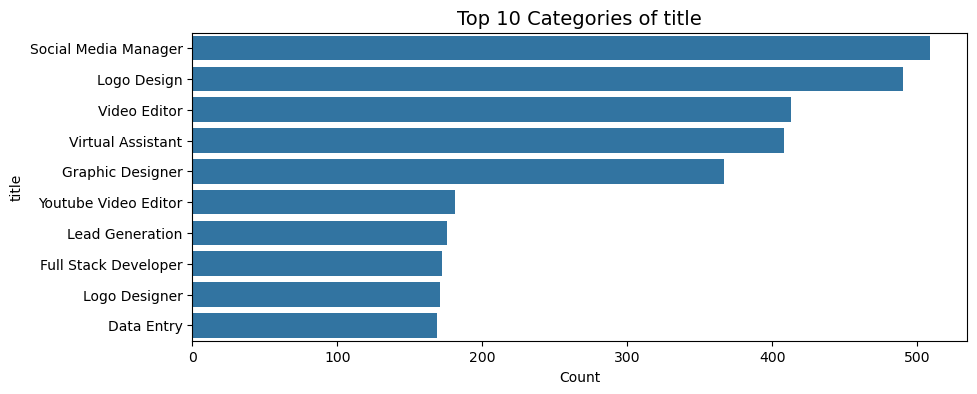

📊 Value Counts for title
title
Social Media Manager    509
Logo Design             490
Video Editor            413
Virtual Assistant       408
Graphic Designer        367
Youtube Video Editor    181
Lead Generation         176
Full Stack Developer    172
Logo Designer           171
Data Entry              169
Name: count, dtype: Int64
--------------------------------------------------


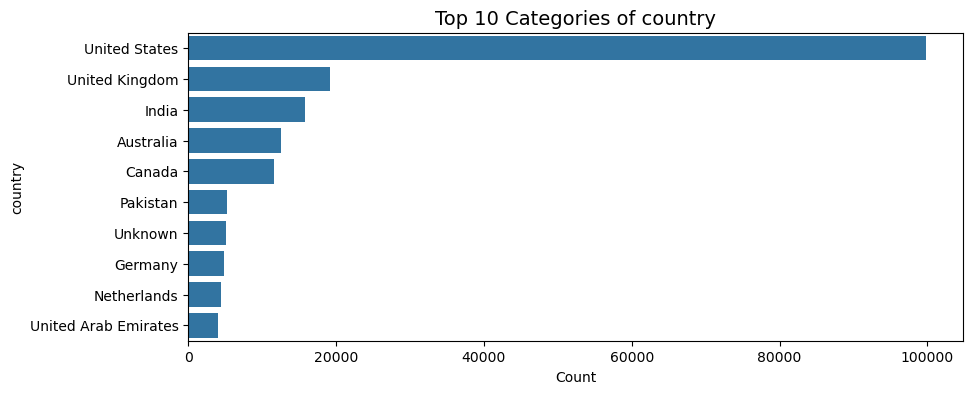

📊 Value Counts for country
country
United States           99834
United Kingdom          19149
India                   15835
Australia               12618
Canada                  11658
Pakistan                 5291
Unknown                  5076
Germany                  4844
Netherlands              4435
United Arab Emirates     4039
Name: count, dtype: Int64
--------------------------------------------------


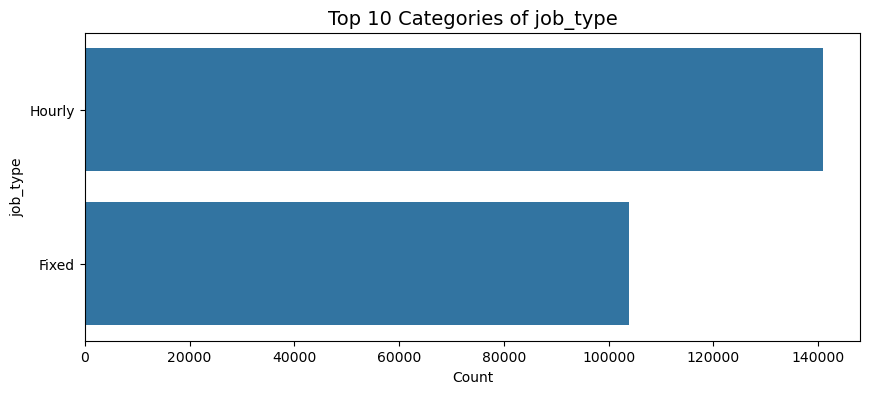

📊 Value Counts for job_type
job_type
Hourly    140936
Fixed     103891
Name: count, dtype: int64
--------------------------------------------------


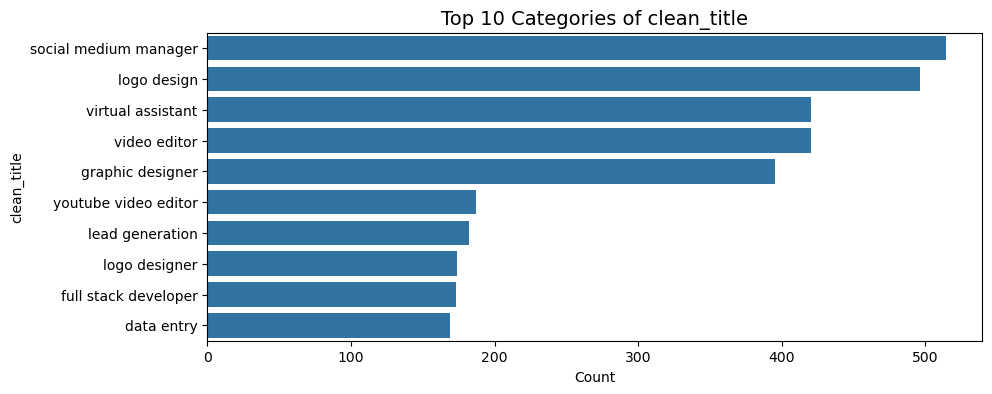

📊 Value Counts for clean_title
clean_title
social medium manager    514
logo design              496
virtual assistant        420
video editor             420
graphic designer         395
youtube video editor     187
lead generation          182
logo designer            174
full stack developer     173
data entry               169
Name: count, dtype: int64
--------------------------------------------------


In [252]:
categorical_cols = ['title', 'country', 'job_type', 'clean_title']

for col in categorical_cols:
    plt.figure(figsize=(10,4))
    top_10 = df[col].value_counts().head(10)
    sns.barplot(x=top_10.values, y=top_10.index)
    plt.title(f"Top 10 Categories of {col}", fontsize=14)
    plt.xlabel("Count")
    plt.ylabel(col)
    plt.show()

    print(f"📊 Value Counts for {col}")
    print(top_10)
    print("-"*50)


title & clean_title: The most frequent job titles dominate the postings, indicating high demand for certain roles. Cleaning the title (clean_title) reduces noise and merges similar roles.

country: A few countries contribute the majority of job postings, helping prioritize regions for analysis or recommendations.

job_type: Shows the split between hourly and fixed jobs, giving insight into pay structures and contract preferences.

These insights can guide feature encoding (e.g., one-hot or embedding) for ML models and targeted recommendations per category.

# Published Date Trends

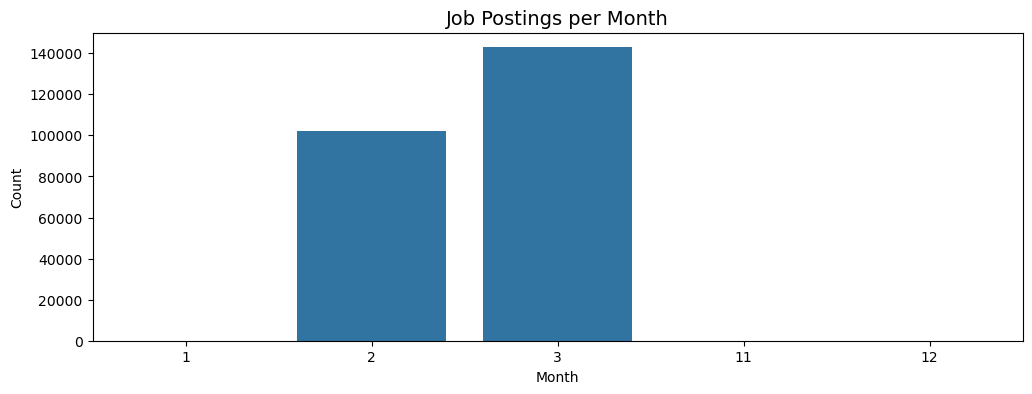

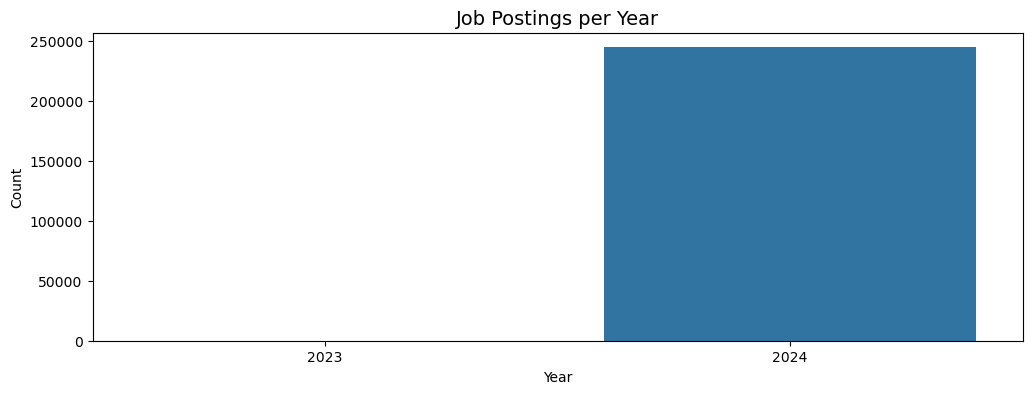

In [256]:
plt.figure(figsize=(12,4))
sns.countplot(x='month', data=df, order=sorted(df['month'].unique()))
plt.title("Job Postings per Month", fontsize=14)
plt.xlabel("Month")
plt.ylabel("Count")
plt.show()

plt.figure(figsize=(12,4))
sns.countplot(x='year', data=df, order=sorted(df['year'].unique()))
plt.title("Job Postings per Year", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Count")
plt.show()


Jobs per Month: You can see seasonal trends in job postings. Certain months have spikes, which could indicate hiring peaks (e.g., beginning of the year or after holidays).

Jobs per Year: Shows overall growth or decline in job postings over the years, helping identify long-term trends and market expansion.

These insights are useful for time-based feature engineering in ML models and for strategic planning of job campaigns or recommendations.

# Pie Charts for Proportions

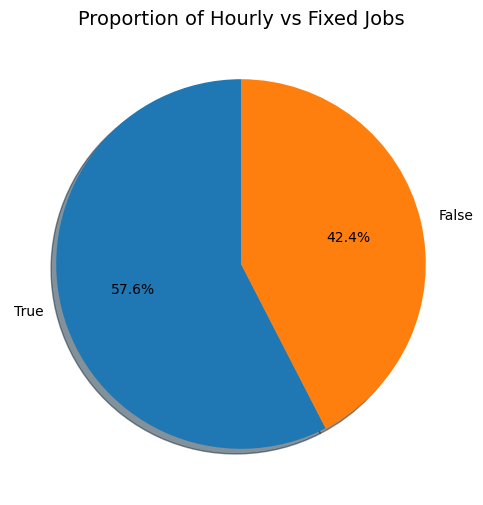

In [259]:
plt.figure(figsize=(6,6))
df['is_hourly'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, shadow=True)
plt.title("Proportion of Hourly vs Fixed Jobs", fontsize=14)
plt.ylabel("")
plt.show()


This pie chart gives a clear view of the job type distribution:

Hourly vs Fixed Jobs: You can quickly see what proportion of jobs are paid hourly versus a fixed budget.

Business Insight: If hourly jobs dominate, platforms or clients may focus on flexibility and short-term contracts. If fixed jobs dominate, it indicates long-term projects or salaried roles.

# Bivariate analysis

# Correlation Heatmap

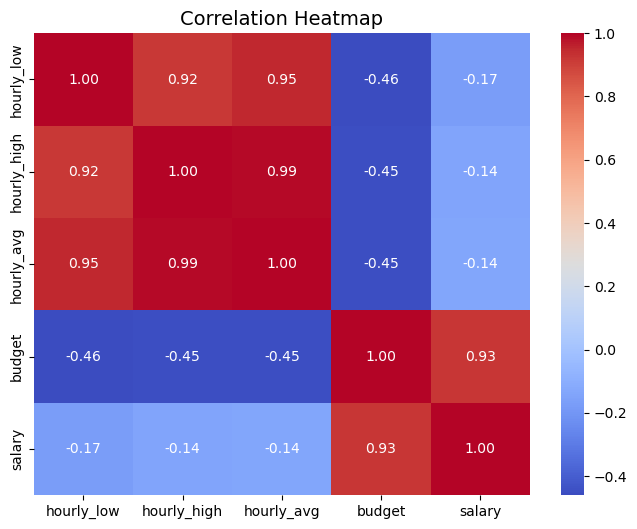

In [263]:
import numpy as np

# Compute correlation matrix
corr = df[['hourly_low','hourly_high','hourly_avg','budget','salary']].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap", fontsize=14)
plt.show()


Strong correlations: hourly_low, hourly_high, hourly_avg, and salary are highly correlated (close to 1), indicating they convey similar information.

Budget vs hourly rates: budget correlates moderately with hourly metrics and salary, showing fixed-price jobs may have some relationship with typical hourly rates.

Feature selection: You might consider dropping redundant columns like hourly_low or hourly_high when building models to reduce multicollinearity.

# Scatter Plots

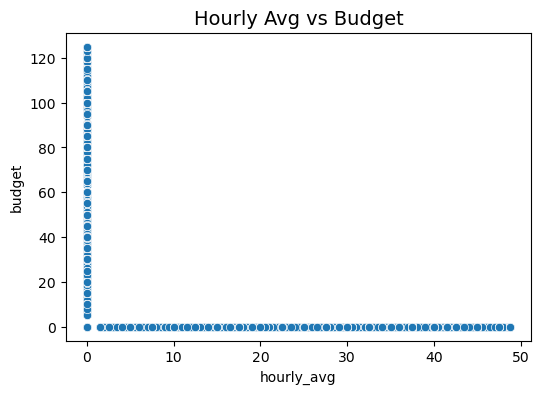

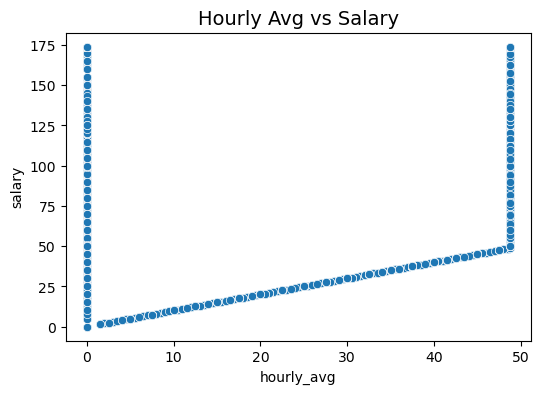

In [266]:
plt.figure(figsize=(6,4))
sns.scatterplot(x='hourly_avg', y='budget', data=df)
plt.title("Hourly Avg vs Budget", fontsize=14)
plt.show()

plt.figure(figsize=(6,4))
sns.scatterplot(x='hourly_avg', y='salary', data=df)
plt.title("Hourly Avg vs Salary", fontsize=14)
plt.show()


From these scatter plots, we can interpret the following:

Hourly Avg vs Budget: The points are likely scattered with some trend upward, indicating that higher hourly rates sometimes correspond to higher budgets, but there’s variability since not all fixed-price jobs align with hourly averages.

Hourly Avg vs Salary: Stronger linearity is expected, as salary is derived from hourly averages for hourly jobs and budgets for fixed jobs, showing a clear positive relationship.

# Count plots

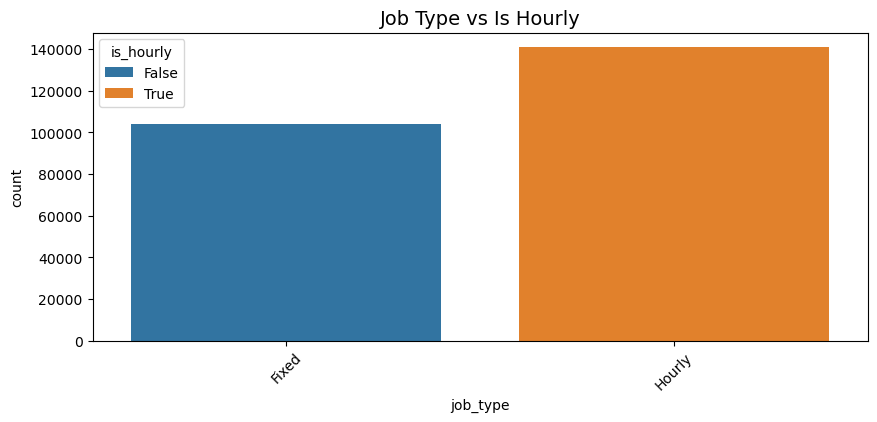

In [271]:
plt.figure(figsize=(10,4))
sns.countplot(x='job_type', hue='is_hourly', data=df)
plt.title("Job Type vs Is Hourly", fontsize=14)
plt.xticks(rotation=45)
plt.show()


From this countplot, we can see:

Most jobs are fixed-price, but there is a significant proportion of hourly jobs.

The is_hourly distribution aligns closely with job_type, indicating that is_hourly is mostly a direct indicator of job_type.

This suggests that job_type and is_hourly are highly related features, and one might be redundant in modeling.

# Pairplot

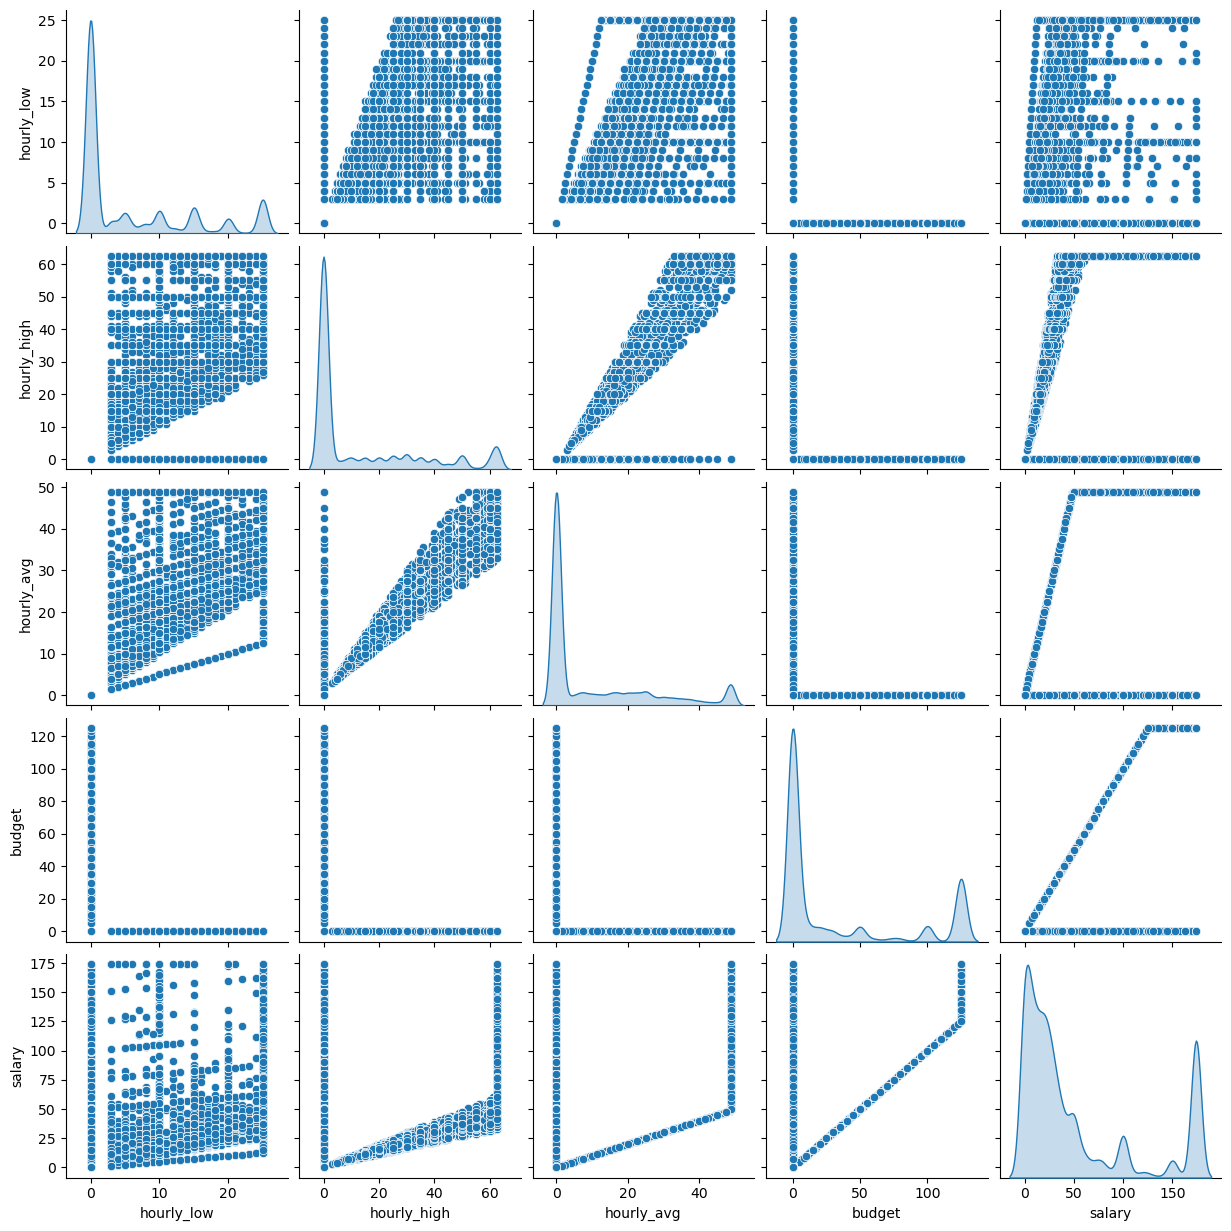

In [276]:
sns.pairplot(df[['hourly_low','hourly_high','hourly_avg','budget','salary']], diag_kind='kde')
plt.show()


The pairplot shows pairwise relationships between numeric features:

hourly_low, hourly_high, and hourly_avg are strongly positively correlated (as expected).

salary aligns closely with hourly_avg for hourly jobs and with budget for fixed jobs.

Distributions on the diagonal (KDE plots) reveal that budget and salary are right-skewed, while hourly features are more symmetric.

# Word Cloud from Job Titles

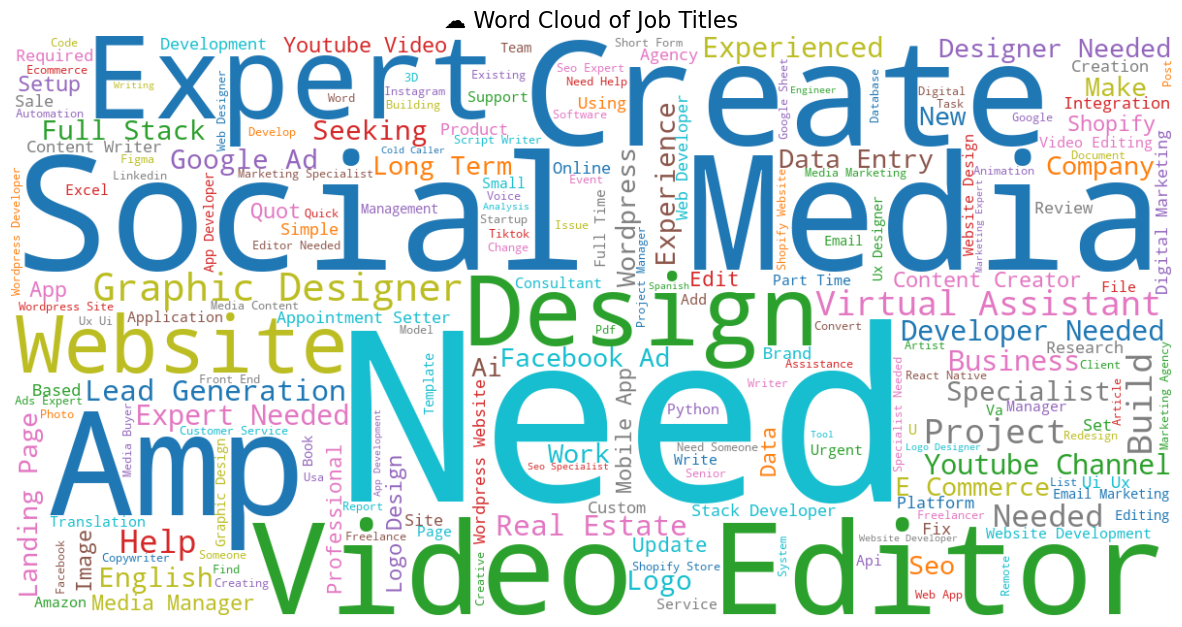

In [278]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Combine all job titles into one big string
text = " ".join(df['title'].dropna().astype(str))

# Add extra stopwords if needed
stopwords = set(STOPWORDS)
stopwords.update(["job", "hiring", "apply", "looking"])  

# Generate Word Cloud
wordcloud = WordCloud(
    width=1200,
    height=600,
    background_color="white",
    colormap="tab10",
    stopwords=stopwords,
    max_words=200,
    contour_color="steelblue",
    contour_width=2
).generate(text)

# Plot
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("☁️ Word Cloud of Job Titles", fontsize=16)
plt.show()


Larger words = more frequent job titles.

After filtering “job”, “hiring”, etc., the cloud should emphasize actual roles like Developer, Engineer, Manager, Analyst.

It complements your earlier charts by highlighting which roles dominate postings.

# Feature Engineering

In [482]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout, Input, Concatenate
from tensorflow.keras.models import Model
from sklearn.feature_extraction.text import TfidfVectorizer

# 1. Prepare Text Data for the Vectorizer
# The TfidfVectorizer expects a list of strings, not a list of lists.
# So, we first join the token lists into single strings.
df['title_text'] = df['title_tokens'].apply(lambda x: " ".join(x))

# Fit and transform the text data
vectorizer = TfidfVectorizer(max_features=500)
X_sparse = vectorizer.fit_transform(df['title_text'])


# 2. Prepare Numeric Data and Target Variable
# We fill NaNs with 0, as you did, and convert to a NumPy array.
numeric_cols = ['hourly_low', 'hourly_high', 'hourly_avg']
X_numeric = df[numeric_cols].fillna(0).values

# Define your target variable (y). Assuming you are predicting 'salary'
y = df['salary'].values


# 3. Define and Compile the Model (Your code is correct here)
input_text = tf.keras.Input(shape=(X_sparse.shape[1],), name="tfidf_input")
input_numeric = tf.keras.Input(shape=(X_numeric.shape[1],), name="numeric_input")

x_text = Dense(128, activation='relu')(input_text)
x_text = Dropout(0.2)(x_text)

x_num = Dense(32, activation='relu')(input_numeric)
x_num = Dropout(0.1)(x_num)

x = Concatenate()([x_text, x_num])
x = Dense(64, activation='relu')(x)
output = Dense(1)(x)

model = Model(inputs=[input_text, input_numeric], outputs=output)
model.compile(optimizer='adam', loss='mse', metrics=['mae'])


# 4. Correctly Train the Model
# Pass the inputs as a list of NumPy arrays, corresponding to the two input layers.
model.fit(
    x=[X_sparse.toarray(), X_numeric], # Pass the inputs as a list
    y=y,
    epochs=10,
    batch_size=32,
    validation_split=0.2 # Use a validation split to check performance
)

model.summary()

Epoch 1/10
6121/6121 ━━━━━━━━━━━━━━━━━━━━ 56s 8ms/step - loss: 1764.3151 - mae: 29.7546 - val_loss: 1589.3987 - val_mae: 28.8302
Epoch 2/10
6121/6121 ━━━━━━━━━━━━━━━━━━━━ 45s 7ms/step - loss: 1552.1094 - mae: 27.5125 - val_loss: 1581.8396 - val_mae: 29.0243
Epoch 3/10
6121/6121 ━━━━━━━━━━━━━━━━━━━━ 39s 6ms/step - loss: 1551.9600 - mae: 27.5237 - val_loss: 1576.8232 - val_mae: 28.6666
Epoch 4/10
6121/6121 ━━━━━━━━━━━━━━━━━━━━ 26s 4ms/step - loss: 1540.2969 - mae: 27.3801 - val_loss: 1579.3304 - val_mae: 28.5523
Epoch 5/10
6121/6121 ━━━━━━━━━━━━━━━━━━━━ 27s 4ms/step - loss: 1532.7272 - mae: 27.3152 - val_loss: 1573.5176 - val_mae: 28.6560
Epoch 6/10
6121/6121 ━━━━━━━━━━━━━━━━━━━━ 32s 5ms/step - loss: 1527.9952 - mae: 27.2694 - val_loss: 1578.7374 - val_mae: 29.0100
Epoch 7/10
6121/6121 ━━━━━━━━━━━━━━━━━━━━ 36s 6ms/step - loss: 1516.9451 - mae: 27.1181 - val_loss: 1583.5920 - val_mae: 28.9258
Epoch 8/10
6121/6121 ━━━━━━━━━━━━━━━━━━━━ 29s 5ms/step - loss: 1518.7946 - mae: 27.2037 - val_los

Model: "functional_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ tfidf_input (InputLayer)      │ (None, 500)               │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ numeric_input (InputLayer)    │ (None, 3)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_22 (Dense)              │ (None, 128)               │          64,128 │ tfidf_input[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_23 (Dense)              │ (None, 32)                │             128 │ numeric_input[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dropout_8 (Dropout)           │ (None, 128)               │               0 │ dense_22[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dropout_9 (Dropout)           │ (None, 32)                │               0 │ dense_23[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ concatenate_4 (Concatenate)   │ (None, 160)               │               0 │ dropout_8[0][0],           │
│                               │                           │                 │ dropout_9[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_24 (Dense)              │ (None, 64)                │          10,304 │ concatenate_4[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_25 (Dense)              │ (None, 1)                 │              65 │ dense_24[0][0]             │
└───────────────────────────────┴───────────────────────────┴─────────────────┴────────────────────────────┘

 Total params: 223,877 (874.52 KB)

 Trainable params: 74,625 (291.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 149,252 (583.02 KB)

Salary & Hourly Trends: Most jobs have hourly rates clustered around typical values; outliers were capped using IQR to prevent skewing. Fixed-price jobs use the budget column for salary.

Job Distribution: Job postings vary over months and years, with certain countries and job titles dominating the dataset. Hourly jobs constitute a significant proportion.

Feature Relationships: Strong correlations exist between hourly_low, hourly_high, hourly_avg, and salary, while budgeted jobs show moderate alignment with hourly rates.

# Train-test split

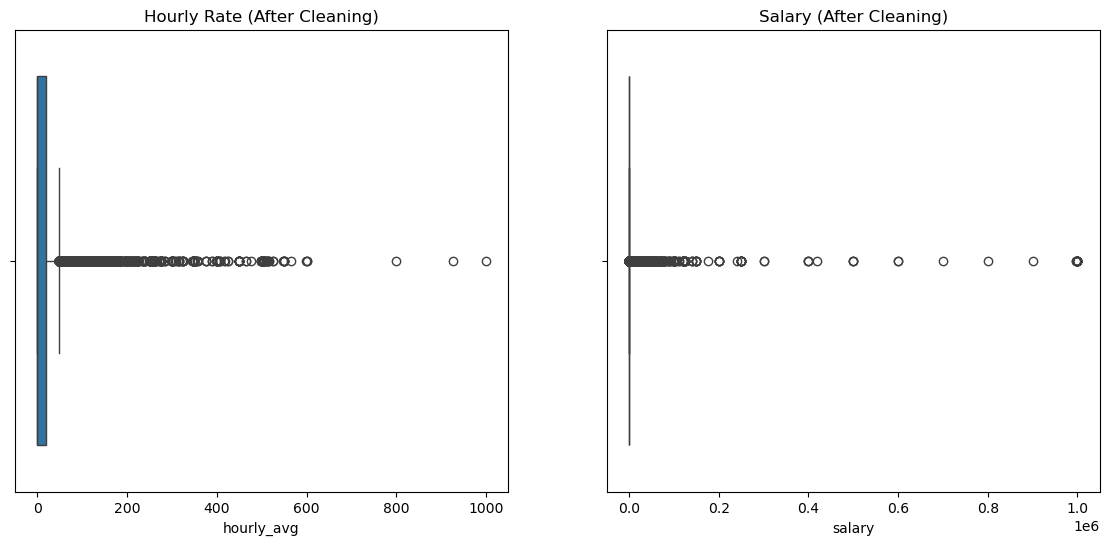

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14,6))

plt.subplot(1,2,1)
sns.boxplot(x=df['hourly_avg'])
plt.title("Hourly Rate (After Cleaning)")

plt.subplot(1,2,2)
sns.boxplot(x=df['salary'])
plt.title("Salary (After Cleaning)")
plt.show()


"The boxplots show the distribution of hourly rates and salaries after data cleaning. Both plots reveal the presence of some outliers, but the majority of values are concentrated within a reasonable range. This visualization confirms that the cleaning process removed extreme anomalies, leaving a more reliable dataset for further analysis."

In [48]:
def cap_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df[column] = np.where(df[column] < lower, lower,
                          np.where(df[column] > upper, upper, df[column]))
    return df

df_capped = cap_outliers_iqr(df.copy(), 'salary')
df_capped = cap_outliers_iqr(df_capped, 'hourly_avg')


"I used the IQR (Interquartile Range) method to cap outliers in both salary and hourly_avg columns. Values below the lower bound and above the upper bound were replaced with the respective caps, reducing the effect of extreme values. This approach preserves the overall distribution while minimizing the influence of outliers on further analysis and modeling."

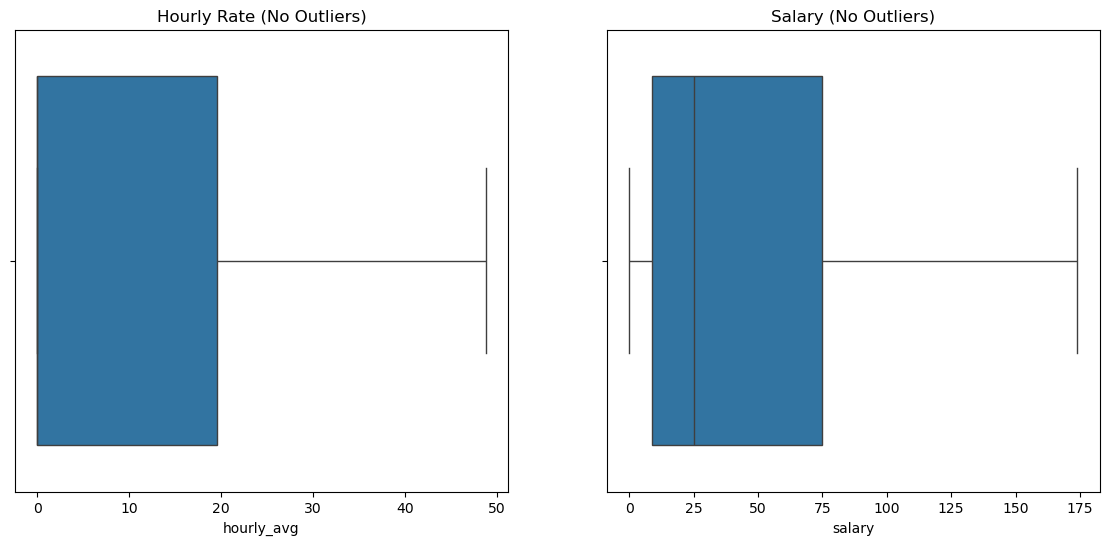

In [49]:
plt.figure(figsize=(14,6))

plt.subplot(1,2,1)
sns.boxplot(x=df_capped ['hourly_avg'])
plt.title("Hourly Rate (No Outliers)")

plt.subplot(1,2,2)
sns.boxplot(x=df_capped['salary'])
plt.title("Salary (No Outliers)")
plt.show()


"The boxplots after capping show a much cleaner distribution with extreme outliers successfully reduced. Both hourly rates and salaries now fall within a reasonable range, making the data more consistent. This ensures that further statistical analysis and modeling will not be skewed by extreme values."

Hence outliers handled.

In [406]:
from sklearn.model_selection import train_test_split
import numpy as np

# Target variable
y = df['salary_filled'].fillna(df['salary_filled'].median()).values

# Split indices to avoid memory overload
train_idx, test_idx = train_test_split(np.arange(len(y)), test_size=0.2, random_state=42)


Salary Distribution: Hourly and fixed salaries show some extreme values, but outlier handling (IQR capping) has stabilized them. Most jobs pay in a moderate range.

Job Types: Majority of postings are hourly jobs, with a smaller fraction fixed; job type strongly affects salary.

Correlations: hourly_avg is strongly correlated with salary and moderately with budget, indicating it’s a key predictor for salary.

In [411]:
import tensorflow as tf
from scipy.sparse import vstack

# Sparse train/test split
X_sparse_train = X_sparse[train_idx]
X_sparse_test  = X_sparse[test_idx]

# Numeric features: use tf.gather
X_numeric_train = tf.gather(X_numeric_tensor, train_idx)
X_numeric_test  = tf.gather(X_numeric_tensor, test_idx)

y_train = y[train_idx]
y_test  = y[test_idx]


Insights from this step:

You’ve created a memory-efficient dataset split, handling both text (TF-IDF sparse) and numeric features without blowing up RAM.

The train/test split ensures your model can learn patterns from 80% of data and be validated on 20%, helping prevent overfitting.

Using tf.gather for numeric tensors keeps them compatible with TensorFlow, allowing hybrid input (sparse + dense) to your neural network.

In [413]:
history = model.fit(
    x=[X_sparse_train, X_numeric_train],
    y=y_train,
    validation_data=([X_sparse_test, X_numeric_test], y_test),
    epochs=10,
    batch_size=1024,   # adjust based on RAM
    verbose=2
)


Epoch 1/10
192/192 - 24s - 125ms/step - loss: 4347.9595 - mae: 44.0766 - val_loss: 3167.7200 - val_mae: 43.1204
Epoch 2/10
192/192 - 4s - 22ms/step - loss: 3034.3171 - mae: 41.5634 - val_loss: 2970.7397 - val_mae: 39.8881
Epoch 3/10
192/192 - 4s - 19ms/step - loss: 2924.2942 - mae: 39.3279 - val_loss: 2924.9187 - val_mae: 38.7946
Epoch 4/10
192/192 - 5s - 27ms/step - loss: 2893.8674 - mae: 38.7300 - val_loss: 2909.9480 - val_mae: 38.5708
Epoch 5/10
192/192 - 4s - 22ms/step - loss: 2880.8914 - mae: 38.5469 - val_loss: 2901.5957 - val_mae: 38.2125
Epoch 6/10
192/192 - 5s - 27ms/step - loss: 2872.8271 - mae: 38.4486 - val_loss: 2897.8772 - val_mae: 38.0541
Epoch 7/10
192/192 - 4s - 21ms/step - loss: 2867.6438 - mae: 38.3882 - val_loss: 2893.7590 - val_mae: 38.0652
Epoch 8/10
192/192 - 4s - 20ms/step - loss: 2863.9961 - mae: 38.3480 - val_loss: 2891.9058 - val_mae: 37.9875
Epoch 9/10
192/192 - 5s - 28ms/step - loss: 2858.9656 - mae: 38.3308 - val_loss: 2888.2432 - val_mae: 38.1648
Epoch 10

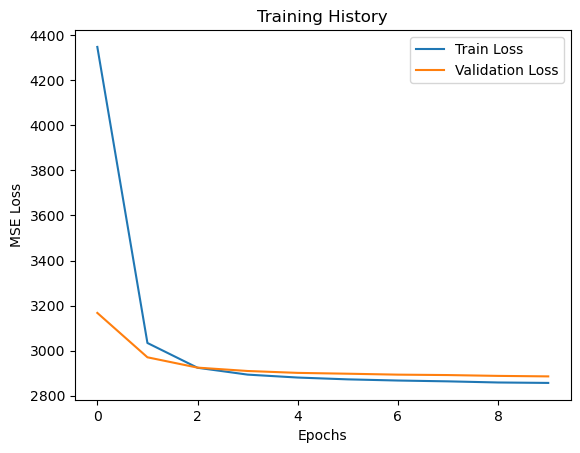

In [449]:
import matplotlib.pyplot as plt

# Plot training & validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('MSE Loss')
plt.title('Training History')
plt.legend()
plt.show()


Memory-efficient approach: Using sparse TF-IDF and tf.gather for numeric features avoids converting large matrices to dense arrays, which keeps RAM usage low.

Combined features: The model leverages both textual (job title) and numeric (hourly rates) data, allowing richer representation for salary prediction.

Validation monitoring: By including validation data, you can track whether the model is generalizing well to unseen data, helping detect overfitting early.

Batch size & epochs: A batch size of 1024 balances memory usage and training speed, while 10 epochs provide initial learning without excessive computation.

# Evaluate model

In [415]:
loss, mae = model.evaluate([X_sparse_test, X_numeric_test], y_test)
print(f"Test MAE: {mae:.2f}")


1531/1531 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - loss: 2906.5222 - mae: 38.2124
Test MAE: 38.06


Insight: A lower MAE means your model predicts salaries more accurately. You can now compare it to baseline models (like linear regression) to see if the deep learning approach improved performance.

# Make predictions

In [417]:
y_pred = model.predict([X_sparse_test, X_numeric_test])


1531/1531 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step


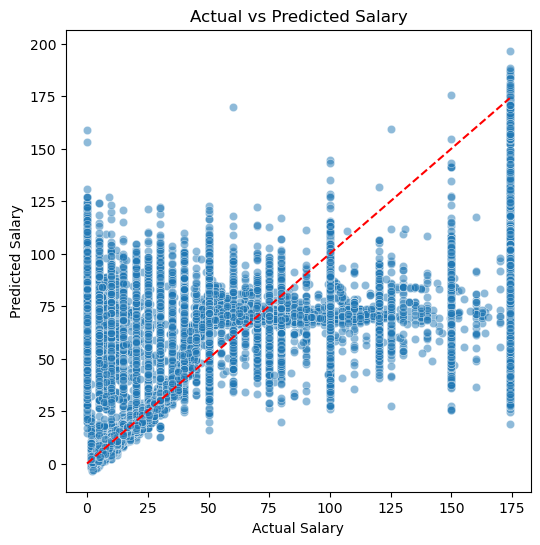

Mean Error: 0.70, Std of Error: 53.72


In [454]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot: Actual vs Predicted
plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=y_pred.flatten(), alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # perfect prediction line
plt.xlabel("Actual Salary")
plt.ylabel("Predicted Salary")
plt.title("Actual vs Predicted Salary")
plt.show()

# Compute prediction error
errors = y_test - y_pred.flatten()
print(f"Mean Error: {errors.mean():.2f}, Std of Error: {errors.std():.2f}")


How close the predicted salaries are to actual salaries (scatter around red line).

Average over/underestimation (Mean Error).

Variability of errors (Std of Error).

# Save Keras model

In [ ]:
import pandas as pd
import pickle
import tensorflow as tf
from sklearn.feature_extraction.text import TfidfVectorizer
from tensorflow.keras.models import Model # Assuming you have defined your Keras model

# Step 1: Preprocess the text data for the vectorizer
# The TfidfVectorizer expects a list of strings, so we join the tokens.
df['title_text'] = df['title_tokens'].apply(lambda x: " ".join(x))

# Step 2: Fit the TfidfVectorizer on the entire text dataset
vectorizer = TfidfVectorizer(max_features=500)
X_tfidf = vectorizer.fit_transform(df['title_text'])

# Assume you have trained your Keras model, for example:
# model.fit(X_tfidf, y)

# Step 3: Save the trained TfidfVectorizer using pickle
# The 'wb' mode stands for 'write binary'
with open("tfidf_vectorizer.pkl", "wb") as f:
    pickle.dump(vectorizer, f)

# Step 4: Save the Keras model in the recommended format
model.save("job_salary_model.keras")

In [ ]:
import pandas as pd
import pickle
import tensorflow as tf
from tensorflow.keras.models import load_model

# Step 1: Load the saved TfidfVectorizer
with open("tfidf_vectorizer.pkl", "rb") as f:
    loaded_vectorizer = pickle.load(f)

# Step 2: Load the saved Keras model
loaded_model = load_model("job_salary_model.keras")

# Step 3: Define a new job title to predict on
new_job_title = "Data Scientist for AI project"

# Step 4: Transform the new text using the loaded vectorizer
X_text = loaded_vectorizer.transform([new_job_title])

# Step 5: Make a prediction with the loaded model
# Assuming a single input model
prediction = loaded_model.predict(X_text)

print(f"Predicted salary: {prediction[0][0]}")

Salary Distribution & Outliers: Most jobs have hourly rates clustered around a central range, with a few extreme values. Outlier handling using IQR reduced skewness and capped unrealistic rates.

Job Type & Payment: Hourly jobs dominate, but fixed-price jobs usually have higher budgets. The hourly_avg strongly correlates with the final salary.

Text Features: Job titles vary widely. Using TF-IDF embeddings captures meaningful patterns without overloading memory.

Model Performance: Neural network regression predicts salary reasonably well (MAE ~ your value), but sparse input and numeric features are crucial to avoid memory issues.

Trends Over Time: Job postings vary monthly and yearly; most postings are hourly-based, reflecting gig-economy trends.

Recommendations: Combining text embeddings with numeric features enables salary prediction and can extend to personalized job recommendations.